In [1]:
# Portfolio Monte Carlo simulation 
# Finding the efficient frontier based on Sharpe Ratio
# Applying a Monte Carlo Simulation using Sharpe Ratio

# These caluclations will inform the portfolio manager on how to balance the risk vs return of the 
# portfolio

# STAGE 1: A SIMPLE ILLUSTRATION OF PROBABILITY DISTRIBUTION

In [2]:
import numpy as np

In [10]:
# Modelling randomness, with a game of two dice
# Two dice are rolled
# When a 7 is rolled, there is a net gain of $5
# If anything other is rolled, $1 is lost
def roll_dice():
        return np.sum(np.random.randint(1, 7, 2))

In [19]:
roll_dice()

4

In [32]:
def monte_carlo_simulation(runs=1000):
    results = np.zeros(2)
    for i in range(runs):
        if roll_dice() == 7:
            results[0] += 1
        else:
            results[1] += 1
    return results

In [37]:
monte_carlo_simulation

<function __main__.monte_carlo_simulation(runs=1000)>

In [38]:
# Experimenting with more runs

results = np.zeros(1000)
for i in range(1000):
    results[i] = monte_carlo_simulation()[0]

In [40]:
results

array([162., 166., 161., 158., 162., 146., 169., 166., 170., 156., 158.,
       173., 153., 179., 192., 175., 168., 173., 151., 181., 158., 171.,
       161., 161., 164., 183., 173., 151., 151., 184., 147., 169., 153.,
       182., 165., 144., 152., 171., 169., 165., 150., 161., 184., 147.,
       160., 171., 168., 160., 173., 146., 169., 172., 175., 164., 173.,
       175., 171., 157., 196., 182., 149., 174., 163., 157., 171., 164.,
       143., 169., 161., 158., 167., 165., 161., 174., 173., 143., 161.,
       171., 166., 172., 171., 167., 195., 162., 164., 175., 175., 159.,
       165., 156., 168., 190., 163., 178., 167., 163., 155., 199., 147.,
       166., 153., 161., 152., 171., 173., 162., 160., 174., 172., 148.,
       149., 158., 153., 148., 177., 158., 159., 165., 156., 170., 169.,
       162., 162., 151., 147., 173., 163., 159., 179., 170., 153., 149.,
       187., 151., 154., 153., 179., 189., 171., 175., 156., 176., 166.,
       172., 167., 147., 178., 151., 201., 168., 15

<IPython.core.display.Javascript object>


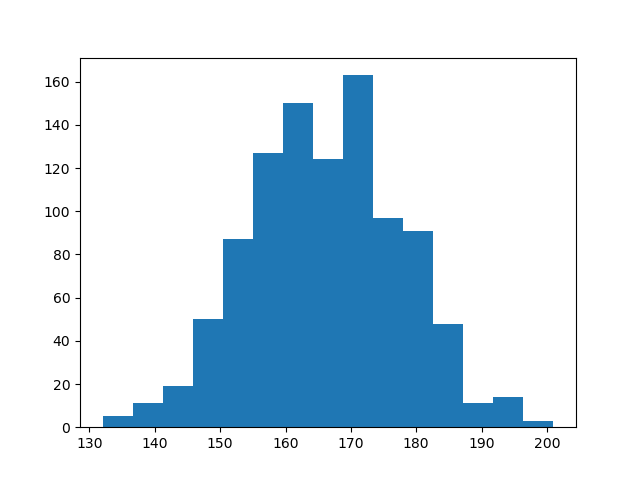

(array([  5.,  11.,  19.,  50.,  87., 127., 150., 124., 163.,  97.,  91.,
         48.,  11.,  14.,   3.]),
 array([132. , 136.6, 141.2, 145.8, 150.4, 155. , 159.6, 164.2, 168.8,
        173.4, 178. , 182.6, 187.2, 191.8, 196.4, 201. ]),
 <BarContainer object of 15 artists>)

In [41]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax = plt.subplots()
ax.hist(results, bins=15)

# This shows the returns and the volatility of 1000 rolls of the dice. If it was less volatile, it would
# centre more closely to the mean.

In [43]:
results.mean()

166.042

In [44]:
results.mean()*5



830.21

In [45]:
# The average loss in USD will be:
1000 - results.mean()

# On average, $3 will be won. This is $833 - $830 . This is a simple situation where there are only two
# variables. 

833.958

In [46]:
# Calculating the probablity:
results.mean()/1000

# A Larger experiment size (n) will result in a more accurate probability.
# Modelling a portfolio has more variables.

0.166042

In [50]:
# Modelling each roll of the dice as an array, and therefore creating two arrays to model two die.

d1 = np.arange(1, 7)
d2 = np.arange(1, 7)

In [51]:
d1

array([1, 2, 3, 4, 5, 6])

In [52]:
matrix = np.add.outer(d1, d2)

In [55]:
matrix

# This matrix represents all the possible values the first die can roll, along the horizontal axis, and 
# all the possible values the second die can roll, along the vertical axis

array([[ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10],
       [ 6,  7,  8,  9, 10, 11],
       [ 7,  8,  9, 10, 11, 12]])

In [56]:
matrix.shape

(6, 6)

In [57]:
matrix.size

# This means that there are 36 different outcomes of rolling two dice

36

In [59]:
matrix[matrix == 7].size

# Calculating how many possible combinations result in the sum of 7

6

In [61]:
matrix[matrix == 7].size/matrix.size

0.16666666666666666

In [62]:
# STAGE 2: APPLYING A MONTE CARLO SIMULATION TO A PORTFOLIO

import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yfin
yfin.pdr_override()

# To get around a breaking change in the yahoo finance API

tickers = ['NVDA', 'INTC', 'AMD', 'TSM']
start = dt.datetime(2019, 1, 1)
data = pdr.get_data_yahoo(tickers, start)

[*********************100%***********************]  4 of 4 completed


In [63]:
# What is the right balance of these stocks, so that the portfolio has the highest Sharpe Ratio 
# possible?

data = data['Adj Close']

In [64]:
data.head()

,AMD,INTC,NVDA,TSM
Date,,,,
2019-01-02,18.830000,41.513222,33.799725,32.560841
2019-01-03,17.049999,39.229469,31.757650,30.635012
2019-01-04,19.000000,41.636681,33.792282,31.178885
2019-01-07,20.570000,41.830650,35.581280,31.410698
2019-01-08,20.750000,42.095188,34.695457,31.152132


In [65]:
log_returns = np.log(data/data.shift())

In [66]:
log_returns

,AMD,INTC,NVDA,TSM
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.099301,-0.056584,-0.062319,-0.060967
2019-01-04,0.108289,0.059553,0.062099,0.017598
2019-01-07,0.079395,0.004648,0.051587,0.007407
2019-01-08,0.008713,0.006304,-0.025211,-0.008266
...,...,...,...,...
2023-04-24,-0.009773,-0.021348,-0.002843,-0.008588
2023-04-25,-0.044005,-0.026650,-0.030068,-0.028157
2023-04-26,0.025216,0.005869,0.026883,-0.000486


In [68]:
# For a portfolio of 4 stocks:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.23816038, 0.10276202, 0.36058439, 0.29849321])

In [69]:
# Calculating the expected return over a year (252 days of trading)

exp_rtn = np.sum(log_returns.mean()*weight)*252

In [70]:
exp_rtn

0.32060117758624607

In [71]:
# Calculating expected volatility

exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))

In [72]:
exp_vol

0.4100523030143585

In [73]:
sharpe_ratio = exp_rtn / exp_vol

In [74]:
sharpe_ratio

# This is a suprisingly low Sharpe Ratio.

0.7818543518216011

In [77]:
# MONTE CARLO SIMULATION
n = 5000
weights = np.zeros((n, 4))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)
for i in range(n):
    weight = np.random.random(4)
    weight /= weight.sum()
    weights[i] = weight
    
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]
    
# The code will run 5000 experiments. All the data from each run is stored: the weights of the 
# portfolios (weights), the expected return (exp_rtns), the expected volatility (exp_vols) and the 
# Sharpe Ratio (sharpe_ratios).
# Then the range is iterated over.
# First a random portfolio in weight is created (notice it will have the sum 1). Then the
# expected annual return is calculated. The expected volatility is calculated using the dot mateix method.
# This is only make the calcuation faster.
# Finally, the Sharpe Ratio is calculated.
# In this specific run (each run will compute different values) the maximum Sharpe Ratio is, given by
# sharpe_ratios.max()

In [78]:
sharpe_ratios.max()

0.912585604449424

In [79]:
# Which run, and therefore which portolio weighting in allocation, is this maximum return?

sharpe_ratios.argmax()

4574

In [80]:
weights[4574]

array([0.04107995, 0.0214727 , 0.85414219, 0.08330516])

In [81]:
# tickers = ['NVDA', 'INTC', 'AMD', 'TSM']
# AMD makes up a majority composition


# VISUALISING THE MONTE CARLO SIMULATION OF THE PORTFOLIO

import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


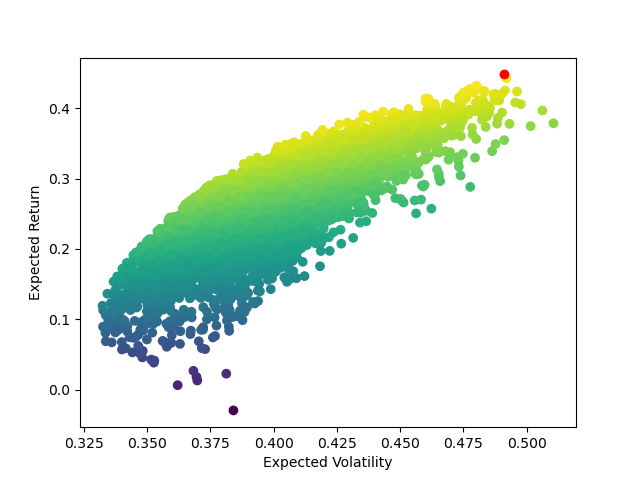

Text(0, 0.5, 'Expected Return')

In [84]:
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')

# Interpreting the plot: each dot represents a portfolio model.
# The colour represents the Sharpe Ratio.
# The top right of the graph has higher return, but is considered too risky with respect to the Sharp Ratio
# The left of the graph is has a lower return and is lower volatility/risk
# The red dot is the optimal balance of risk and return, according to the Sharpe Ratio

# The curve is the efficienct frontier.